In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import operator

import math

import warnings
warnings.filterwarnings("ignore")

# Data 

Please, download the data to your working folder.On the webpage you can find its description. 

https://archive.ics.uci.edu/ml/datasets/Iris


In [2]:
# iris = pd.read_csv('iris.data',header=None, names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target names'])
iris = pd.read_csv('iris.data',header=None, names=['sl', 'sw', 'pl', 'pw', 'target'])


iris['target'] = iris['target'].map({'Iris-setosa':1, 'Iris-versicolor':0, 'Iris-virginica':0})

X = iris.iloc[:, :-1]

y = iris.iloc[:, -1]

X = np.c_[np.ones((X.shape[0], 1)), X]

# y = y[:, np.newaxis]

theta = np.zeros((X.shape[1], 1))

del iris

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, shuffle=True)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.11, random_state=42, shuffle=True)
del X, y

# Classification

## Logistic Regression

### Implement the "loss" function for Logistic Regression 

In [4]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

net_input = lambda theta, x: np.dot(x, theta)

probability = lambda theta, x: sigmoid(net_input(theta, x))

In [5]:
def loss_function(theta, x, y):
    """ 
    Loss function implementation. 
  
    This function uses some of above implemented functions. 
  
    Parameters: 
    theta (array): Initial theta, which i choose all zeros
    x (DataFrame): features
    y (DataFrame): labels
  
    Returns: 
    float: total loss value 
  
    """
    
    
    m = x.shape[0]
    
    total_loss = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x))
    )
    
    return total_loss

### Implement the "fit" function gradient descent

In [7]:
# from scipy.optimize import fmin_tnc
# def fit(x, y, theta):
#     opt_weights = fmin_tnc(func=loss_function, x0=theta,
#                   fprime=gradient,args=(x, y.flatten()))
#     return opt_weights[0]
# parameters = fit(X_train, y_train, theta)
# parameters

In [8]:
def fit_gd(x, y, theta, lr = 0.01, n_iterations = 1000):
    """ 
    Fit function implementation. 
  
    This function minimize the loss value by gradient descent. 
  
    Parameters: 
    theta (array): Initial theta, which i choose all zeros
    x (DataFrame): features
    y (DataFrame): labels
    lr (float) : learning rate
    n_iterations (int): number of iterations, steps of gradient descent
  
    Returns: 
    float: total loss value 
    array: fitted parameters
  
    """
    
    
    def gradient(theta, x, y):
        m = x.shape[0]

        return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

    
    loss_ = []
    y = y[:, np.newaxis]
    
    for _ in range(n_iterations):
        theta -= lr * gradient(theta,x, y )
        loss = loss_function(theta, x, y)
        loss_.append(loss)
        
    return theta, loss_

### Implement predict function

In [9]:
def predict(x, theta, probab_threshold=0.5):
    """ 
    Predict function implementation. 
  
    This function does the prediction. 
  
    Parameters: 
    theta (array): Initial theta, which i choose all zeros
    x (DataFrame): features
    probab_thresgold (float): from 0 to 1 float value for probability threshold
  
    Returns: 
    DataFrame: Predicted classes
  
    """
    
    
    probab = probability(theta, x)
    
    predicted_classes = (probab >= probab_threshold).astype(int)
    
    return predicted_classes.flatten()

### To evaluate the model, use accuracy, precision and recall metrics 

In [10]:
def accuracy(predicted_classes, actual_classes):
    """ 
    Accuracy function implementation. 
  
    This function calculates the accuracy of prediction. 
  
    Parameters: 
    predicted_classes (DataFrame): predicted classes
    actual_classes (DataFrame): real labels of dataset
  
    Returns: 
    float: the percentage of accuracy
  
    """
    
    
    accuracy = np.mean(predicted_classes == actual_classes)
    
    return accuracy * 100

In [11]:
def confusion_matrix(predicted_classes, actual_classes):
    """ 
    Confusion matrix implementation. 
  
    This function will be used in precision and recall calculation. 
  
    Parameters: 
    predicted_classes (DataFrame): predicted classes
    actual_classes (DataFrame): real labels of dataset
  
    Returns: 
    dictionary: confusion matrix
  
    """
    
    
    TP = []
    TN = []
    FN = []
    FP = []
    
#     actual_classes = actual_classes[:, np.newaxis].flatten()
    actual_classes = actual_classes.values
    
    for i in range(len(actual_classes)):
        TP.append(predicted_classes[i] & actual_classes[i])
        TN.append(abs(predicted_classes[i]-1) & abs(actual_classes[i]-1))
        FP.append(np.where(predicted_classes[i]-actual_classes[i] == 1, 1, 0))
        FN.append(np.where(predicted_classes[i]-actual_classes[i] == -1, 1, 0))
        
    conf_mat = {
        'TP': float(np.sum(TP)),
        'TN': float(np.sum(TN)),
        'FN': float(np.sum(FN)),
        'FP': float(np.sum(FP))
    }
    
    return conf_mat

In [12]:
def precision(predicted_classes, actual_classes):
    """ 
    Precision function implementation. 
  
    This function calculates the precision of predictions by TP / TP + FP. 
  
    Parameters: 
    predicted_classes (DataFrame): predicted classes
    actual_classes (DataFrame): real labels of dataset
  
    Returns: 
    float: precision
  
    """
    
    
    conf_mat = confusion_matrix(predicted_classes, actual_classes)
    
    prec = conf_mat['TP'] / np.where(conf_mat['TP'] + conf_mat['FP'] == 0.0, 1, conf_mat['TP'] + conf_mat['FP'])
    
    return prec

In [13]:
def recall(predicted_classes, actual_classes):
    """ 
    Recall function implementation. 
  
    This function calculates the recall of predictions by TP / TP + FN. 
  
    Parameters: 
    predicted_classes (DataFrame): predicted classes
    actual_classes (DataFrame): real labels of dataset
  
    Returns: 
    float: recall
  
    """
    
    
    conf_mat = confusion_matrix(predicted_classes, actual_classes)
    
    rc = conf_mat['TP'] / np.where(conf_mat['TP'] + conf_mat['FN'] == 0.0, 1, conf_mat['TP'] + conf_mat['FN'] )
    
    return rc

### Choose the best learning rate

In [14]:
learning_rates = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

# theta = np.zeros((X_train.shape[1], 1))

for lr in learning_rates:
    theta = np.zeros((X_train.shape[1], 1))
    
    fitted_parameters = fit_gd(X_train, y_train, theta, n_iterations=1000, lr=lr)[0]

    predicted_classes = predict(X_validation, fitted_parameters)
    
    print('accuracy, precision and recall for {} learning rate:  {}%, {}, {}'.format(lr, accuracy(predicted_classes, y_validation), precision(predicted_classes, y_validation), recall(predicted_classes, y_validation)))

accuracy, precision and recall for 1e-10 learning rate:  73.33333333333333%, 0.0, 0.0
accuracy, precision and recall for 1e-09 learning rate:  73.33333333333333%, 0.0, 0.0
accuracy, precision and recall for 1e-08 learning rate:  73.33333333333333%, 0.0, 0.0
accuracy, precision and recall for 1e-07 learning rate:  73.33333333333333%, 0.0, 0.0
accuracy, precision and recall for 1e-06 learning rate:  73.33333333333333%, 0.0, 0.0
accuracy, precision and recall for 1e-05 learning rate:  73.33333333333333%, 0.0, 0.0
accuracy, precision and recall for 0.0001 learning rate:  73.33333333333333%, 0.0, 0.0
accuracy, precision and recall for 0.001 learning rate:  100.0%, 1.0, 1.0
accuracy, precision and recall for 0.01 learning rate:  100.0%, 1.0, 1.0
accuracy, precision and recall for 0.1 learning rate:  100.0%, 1.0, 1.0
accuracy, precision and recall for 1 learning rate:  100.0%, 1.0, 1.0


In [15]:
theta = np.zeros((X_train.shape[1], 1))
final_params, loss_output = fit_gd(X_train, y_train, theta, n_iterations=1000, lr=0.001 )

### Plot loss output depending on iteration 

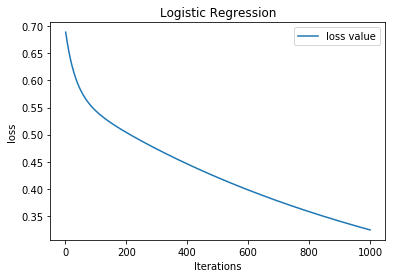

In [16]:
plt.plot(range(1, len(loss_output) + 1), loss_output, label = 'loss value')

plt.xlabel('Iterations')

plt.ylabel('loss')

plt.title('Logistic Regression')

plt.legend()

plt.show();

### Report the prediction accuracy on test data

In [17]:
predicted_classes = predict(X_test, final_params)

In [18]:
accuracy(predicted_classes, y_test)

100.0

In [19]:
precision(predicted_classes, y_test)

1.0

In [20]:
recall(predicted_classes, y_test)

1.0

## K-NN classification

### Create training/validation/test datasets with 80/10/10 ratio. Make sure that they do not overlap

In [21]:
iris = pd.read_csv('iris.data',header=None, names=['sl', 'sw', 'pl', 'pw', 'target'])
iris['target'] = pd.factorize(iris.target)[0]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :4], iris.iloc[:, 4:], test_size=0.10, random_state=42, shuffle=True)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.11, random_state=42, shuffle=True)

In [23]:
if (X_train.shape[0] + X_test.shape[0] + X_validation.shape[0] == iris.iloc[:, :4].shape[0]):
    print('They don\'t overlap')
else:
    print('They overlap')

They don't overlap


### Implement the K-NN algorithm: create two functions, fit() - that is responsible for training and predict() - which is responsible for predicting the values for new data points
 

In [24]:
def fit_knn(X_train, X_to_predict, k = 3):
    """ 
    Fit function implementation. 
  
    This is the fit function of KNN algorithm which uses euclidean distance as distance metric 
  
    Parameters: 
    X_train (DataFrame): train dataset
    X_to_predict (DataFrame): the dataset for which we want to do prediction
  
    Returns: 
    dictionary: k neighbours for each object of X_to_pedict dataset
  
    """
    
    
    def euclidean_distance(sample1, sample2, length):
        distance = 0

        for x in range(length):
            distance += (sample1[x] - sample2[x]) ** 2

        return math.sqrt(distance)
    
    def get_index_of_neighbours(training_set, test_instance, k):
        distances = []

        length = len(test_instance) - 1

        for idx in range(len(training_set)):
            dist = euclidean_distance(test_instance,training_set[idx : idx + 1].values[0], length)

            distances.append((training_set[idx : idx + 1].index.values.astype(int)[0], dist))

        distances.sort(key = operator.itemgetter(1))

        neighbors = []

        for x in range(k):
            neighbors.append(distances[x][0])

        return neighbors


    neighbours = {}
    
    for test_instance_index in range(len(X_to_predict)):
        test_instance = X_to_predict[test_instance_index : test_instance_index + 1]
        
        neighbours[test_instance.index.values.astype(int)[0]] = (get_index_of_neighbours(X_train, test_instance.values[0], k))
        
    return neighbours

In [25]:
def prediction_knn(fitted_neighbours):
    """ 
    Prediction function implementation. 
  
    This function does prediction of X_to_Predict dataset's objects 
  
    Parameters: 
    fitted_neighbours: This is the result of fit_knn function which is a dictionary consisting of index as a key and neighbours as a value
  
    Returns: 
    DataFrame: predicted classes of each element
  
    """
    
    
    def prediction_specific_row(index_of_neighbours):
        neighbours_classes = []

        for row_index in index_of_neighbours:
            neighbours_classes.append(y_train.loc[row_index, :][0])

        return neighbours_classes
    def find_class(neighbors):
        votes = {}

        for clas in range(len(neighbors)):
            if neighbors[clas] in votes:
                votes[neighbors[clas]] += 1
            else:
                votes[neighbors[clas]] = 1

        sorted_votes = sorted(votes.items(), key = operator.itemgetter(1), reverse = True)

        return sorted_votes[0][0]
    
    
    neighbours_classes = {}
    
    for index_of_row_prediction, neighbours in fitted_neighbours.items():
        neighbours_classes[index_of_row_prediction] = prediction_specific_row(neighbours)
    
    index = []
    predicted_classes = []
    
    for index_of_row_prediction, classes_of_neighbours in neighbours_classes.items():
        index.append(index_of_row_prediction)
        predicted_classes.append(find_class(classes_of_neighbours))
        
    prediction_df = pd.DataFrame(predicted_classes, index=index, columns=['prediction'])
    
    return prediction_df

### For evaluation we will use "accuracy" metric - implement it :)

In [26]:
def accuracy(actual, predicted):
    """ 
    Accuracy function implementation. 
  
    This function calculates the accuracy of prediction 
  
    Parameters: 
    actual (DataFrame): labels
    predicted (DataFrame): this is the result of prediction function
  
    Returns: 
    float: this is the percentage of prediction accuracy
  
    """
    
    
    correct = 0
    
    for row_number in range (len(actual)):
        if actual.values[row_number][0] == predicted.values[row_number][0]:
            correct += 1
            
    return (correct/float(len(actual))) * 100.0

### Choose the best "k" value and report the accuracy for all k-values you have tried on validation data

In [27]:
K = [1,2,3,4,5,6,7,8,9,10]

for k in K:
    model = fit_knn(X_train, X_validation, k)
    
    predict_validation = prediction_knn(model)
    
    accuracy_validation = accuracy(y_validation, predict_validation)
    
    print('accuracy for k = {} is equal to {} %'.format(k, round(accuracy_validation, 1)))

accuracy for k = 1 is equal to 100.0 %
accuracy for k = 2 is equal to 100.0 %
accuracy for k = 3 is equal to 93.3 %
accuracy for k = 4 is equal to 93.3 %
accuracy for k = 5 is equal to 93.3 %
accuracy for k = 6 is equal to 100.0 %
accuracy for k = 7 is equal to 100.0 %
accuracy for k = 8 is equal to 100.0 %
accuracy for k = 9 is equal to 100.0 %
accuracy for k = 10 is equal to 100.0 %


Considering that a small value of k means that noise will have a greater impact on the result, and a large value will make it computationally expensive, I will choose k = 6 as the best value for k

### Report the accuracy for the best value of k on test data

In [28]:
model = fit_knn(X_train, X_test, 6)
    
predict_test = prediction_knn(model)
    
accuracy_test = accuracy(y_test, predict_test)
    
print('accuracy on the test data is equal to {} %'.format(round(accuracy_test, 3)))

accuracy on the test data is equal to 80.0 %
